In [4]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
server='DESKTOP-T005PC0'
database='ventasBD'
username='sa'
password='Sql*03*'
driver='ODBC Driver 17 for SQL Server'

In [6]:
# Formato de cadena de conexión para SQL Server
connection_string = (
    f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver.replace(' ','+')}"
)

In [7]:
# Crear el motor de SQLAlchemy
engine = create_engine(connection_string)

In [8]:
# Cargar datos desde SQL Server
try:
    query = "SELECT * FROM Ventas"
    df = pd.read_sql(query, engine)
    print("Datos cargados correctamente:")
    print(df.head())
    
except Exception as e:
    print(f"Error al cargar datos: {e}")

finally:
    engine.dispose()  # Cerrar la conexión

Datos cargados correctamente:
   ventaID       fecha  producto     categoria  cantidad   precio     ciudad
0        1  2023-01-05    Laptop  Electrónicos         2  1200.00     Madrid
1        2  2023-01-05    Camisa          Ropa         5    25.99  Barcelona
2        3  2023-02-10  Teléfono  Electrónicos         3   800.50   Valencia
3        4  2023-02-15      Sofá         Hogar         1  1500.75     Madrid
4        5  2023-03-20   Zapatos          Ropa         4    60.00    Sevilla


In [13]:
# Calcular venta total por registro
df['Venta_total'] = df['cantidad'] * df['precio']

In [16]:
# Ventas totales por categoría
ventas_por_categoria = df.groupby('categoria')['Venta_total'].sum().reset_index()

In [20]:
# Ventas mensuales
df['Mes'] = pd.to_datetime(df['fecha']).dt.month_name()
ventas_mensuales= df.groupby('Mes')['Venta_total'].sum().reset_index()

In [22]:
# Ventas por ciudad
ventas_por_ciudad = df.groupby('ciudad')['Venta_total'].sum().reset_index()

In [24]:
# --- Visualización con Matplotlib y Seaborn ---
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Ventas ($)')

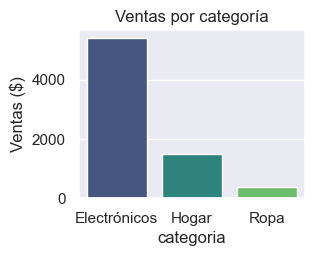

In [26]:
# Gráfico 1: Ventas por categoría (Barras)
plt.subplot(2,2,1)
sns.barplot(data=ventas_por_categoria, x='categoria', y='Venta_total', hue='categoria', palette='viridis')
plt.title('Ventas por categoría')
plt.xlabel('categoria')
plt.ylabel('Ventas ($)')

([0, 1, 2],
 [Text(0, 0, 'February'), Text(1, 0, 'January'), Text(2, 0, 'March')])

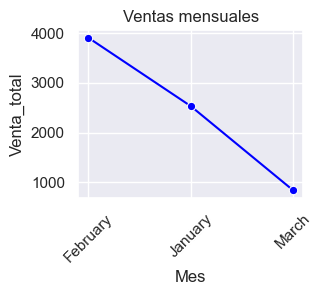

In [28]:
# Gráfico 2: Ventas mensuales (Líneas)
plt.subplot(2,2,2)
sns.lineplot(data=ventas_mensuales, x='Mes', y='Venta_total', marker='o', color='blue')
plt.title('Ventas mensuales')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Distribuccion de ventas por ciudad')

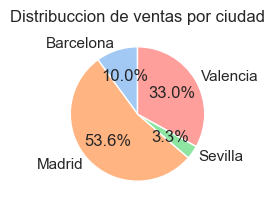

In [34]:
# Gráfico 3: Ventas por ciudad (Tarta)
plt.subplot(2,2,3)
plt.pie(
    ventas_por_ciudad['Venta_total'],
    labels=ventas_por_ciudad['ciudad'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90
    )
plt.title('Distribuccion de ventas por ciudad')

Text(0, 0.5, 'Cantidad Vendida')

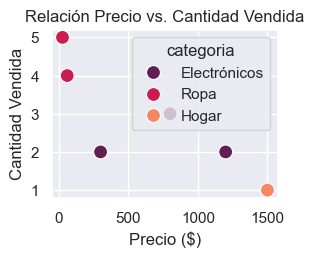

In [36]:
# Gráfico 4: Dispersión Precio vs. Cantidad
plt.subplot(2,2,4)
sns.scatterplot(
    data=df,
    x='precio',
    y='cantidad',
    hue='categoria',
    palette='rocket',
    s=100 # Tamaño de los puntos
)
plt.title('Relación Precio vs. Cantidad Vendida')
plt.xlabel('Precio ($)')
plt.ylabel('Cantidad Vendida')


In [38]:
# Ajustar layout y mostrar gráficos
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>